# Check chemistry

Add Magritte folder to python path.

In [1]:
import sys
sys.path.insert(0, '/home/frederik/Dropbox/Astro/Magritte/pyIO')

Import modules and use MagritteIO as you would in piIO.

In [2]:
import numpy as np
import pylab as plt
import MagritteIO as mio

% matplotlib inline

Get the current (i.e. most recent) output directory and the number of outputs it contains. Read the Magritte output from the outputDirectory into the cell structure. Each output has its own cell structure. cells is the array of cell structures for all outputs.

In [4]:
outputDirectory = mio.outputDirectory()           # current output directory
nOutputs        = mio.nOutputs(outputDirectory)   # number of outputs

tags  = range(nOutputs)
cells = [mio.cell(outputDirectory, str(tag)) for tag in tags]


## Plot output

### Gas temperature

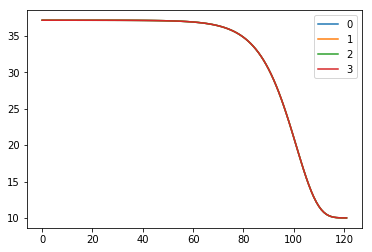

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].temperatureGas, label=i)
ax1.legend()

### Dust temperature

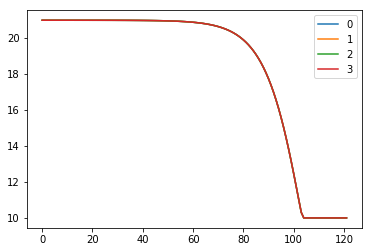

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(nOutputs):
    ax1.plot(cells[i].temperatureDust, label=i)
ax1.legend()

### Abundances

/usr/lib/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


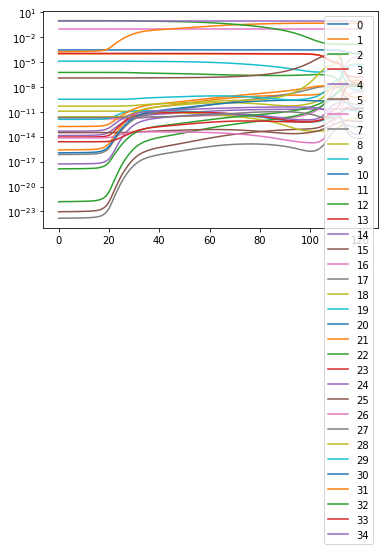

In [7]:
tag = 3

nspec = np.shape(cells[tag].abundances)[1]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for s in range(nspec):
    ax1.plot(cells[tag].abundances[:,s], label=s)
    ax1.set_yscale('log')
ax1.legend()

## Compare against 3D-PDR

In [8]:
def compare(X,Y): return 2.0*(X-Y)/(X+Y)

In [9]:
abnRef = []
abnRef.append(np.loadtxt('abundances_0_3D-PDR.txt'))
abnRef.append(np.loadtxt('abundances_1_3D-PDR.txt'))
abnRef.append(np.loadtxt('abundances_2_3D-PDR.txt'))
abnRef.append(np.loadtxt('abundances_3_3D-PDR.txt'))

/usr/lib/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


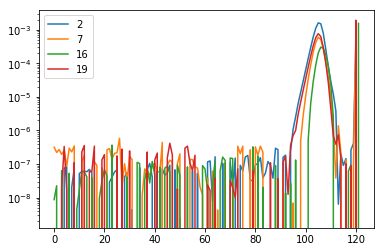

In [10]:
tag = 3

nspec = np.shape(cells[tag].abundances)[1]

diff = compare(cells[tag].abundances,abnRef[tag])

fig = plt.figure()
ax1 = fig.add_subplot(111)

for s in range(nspec):
    if sum(diff[:,s]) > 0.001:
        ax1.plot(diff[:,s], label=s)
ax1.set_yscale('log')
ax1.legend()